<a href="https://colab.research.google.com/github/Prakum14/Testfiles/blob/master/Copy_of_M3_NB_MiniProject_2_Keywords_Extraction_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project: Keywords Extraction using Transformer

## Learning Objectives

At the end of the experiment, you will be able to :

* perform data preprocessing, EDA and feature extraction on the Medical Transcription dataset
* build transformer components - positional embedding, encoder, decoder, etc
* train a transformer model for keywords extraction
* create function to perform inference using trained transformer
* use the gradio library  to generate a customizable UI for displaying the extracted keywords

## Dataset description

The dataset used in this project is the **Medical transcription** dataset. It contains sample medical transcriptions for various medical specialties.

The data is in CSV format with below features:

- **description**

- **medical_specialty**

- **sample_name**

- **transcription**

- **keywords**

##  Grading = 10 Points

## Information

Medical transcriptions are textual records of patient-doctor interactions, medical procedures, clinical findings, and more. Extracting keywords from these transcriptions can provide valuable insights into a patient's health status, medical history, and treatment plans.

* Significance:

  - Data Summarization: Keyword extraction helps in summarizing lengthy medical transcriptions, making it easier for healthcare professionals to quickly understand the patient's medical history.

  - Search and Retrieval: Extracted keywords can be used to index medical records, facilitating faster search and retrieval of relevant documents.

  - Trend Analysis: By analyzing frequently occurring keywords, healthcare institutions can identify common ailments, treatment outcomes, and more.

* Applications:

  - Clinical Decision Support: Extracted keywords can be used to develop clinical decision support systems that provide real-time suggestions to healthcare professionals.
  - Patient Monitoring: By continuously analyzing the keywords from a patient's medical transcriptions, healthcare systems can monitor the patient's health and predict potential health risks.
  - Research: Medical researchers can use extracted keywords to identify trends, study disease outbreaks, and understand treatment efficacies.
  - Billing and Insurance: Keywords can help in automating the medical coding process, which is essential for billing and insurance claims.

### Problem Statement

Build a transformer model for performing keywords extraction on medical transcription dataset.

**Note:**
> For some steps such as how to create a positional embedding layer, transformer components - encoder and decoder blocks, etc you may need to refer to the ***M3 Assignment-5 on Transformer_Decoder***.

### Import required packages

In [1]:
import numpy as np
import pandas as pd
import re
import random
import string
from string import digits
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer, tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#@title Download the dataset
!wget -q https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/Medical_transcription_dataset.csv
!ls | grep ".csv"

Medical_transcription_dataset.csv


**Exercise 1: Read the Medical_transcription_dataset.csv dataset**

**Hint:** pd.read_csv()

In [3]:
# Load the dataset
# YOUR CODE HERE

data = pd.read_csv('Medical_transcription_dataset.csv')

In [4]:
data

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tr...","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. He exercises three times a week at...","bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic,..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC today. He is a very pleasant gentleman who is 42 years old, 344 pounds. He is 5'9"". He has a BMI of 51. He has been overweight for ten years since...","bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, ..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement with left atrial diameter of 4.7 cm.,2. Normal size right and left ventricle.,3. Normal LV systolic function with left ventricular ejection fraction of...","cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall thickness appear normal. The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%. ...,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation..."
...,...,...,...,...,...,...
4994,4994,"Patient having severe sinusitis about two to three months ago with facial discomfort, nasal congestion, eye pain, and postnasal drip symptoms.",Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and evaluating the patient referred today for evaluation and treatment of chronic sinusitis. As you are well aware, she is a pleasant 50-year-old female w...",NaN
4995,4995,"This is a 14-month-old baby boy Caucasian who came in with presumptive diagnosis of Kawasaki with fever for more than 5 days and conjunctivitis, mild arthritis with edema, rash, resolving and wit...",Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCHARGE DIAGNOSIS:, Kawasaki disease, resolving.,HOSPITAL COURSE:, This is a 14-month-old baby boy Caucasian who came in with presumptive diagnosis of ...","allergy / immunology, mucous membranes, conjunctivitis, ad lib, kawasaki disease, vaccine, fever, aspirin"
4996,4996,A female for a complete physical and follow up on asthma with allergic rhinitis.,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white female who comes in today for a complete physical and follow up on asthma. She says her asthma has been worse over the last three months. She has been u...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presents to Children's Hospital Emergency Department by

### Pre-processing and EDA

**Exercise 2: Perform below operations on the dataset [0.5 Mark]**

- Remove unnecessary columns - 'Unnamed: 0'
- Handle missing values
- Remove rows from data where `keywords` is only single empty space ' $ $ '
- Remove duplicates from data considering `transcription` and `keywords` columns


- **Remove unnecessary columns - 'Unnamed: 0'**

In [5]:
# YOUR CODE HERE

data.drop('Unnamed: 0', axis=1, inplace=True)


In [6]:

data = data.dropna()

data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tr...","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. He exercises three times a week at...","bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic,..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC today. He is a very pleasant gentleman who is 42 years old, 344 pounds. He is 5'9"". He has a BMI of 51. He has been overweight for ten years since...","bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, ..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement with left atrial diameter of 4.7 cm.,2. Normal size right and left ventricle.,3. Normal LV systolic function with left ventricular ejection fraction of...","cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall thickness appear normal. The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%. ...,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation..."
...,...,...,...,...,...
4984,Patient suffered from morbid obesity for many years and made multiple attempts at nonsurgical weight loss without success.,Bariatrics,Discharge Summary - Gastric Bypass,"ADMISSION DIAGNOSIS:, Morbid obesity. BMI is 51.,DISCHARGE DIAGNOSIS: , Morbid obesity. BMI is 51.,PROCEDURE: , Laparoscopic gastric bypass.,SERVICE: , Surgery.,CONSULT: , Anesthesia and pain.,...","bariatrics, laparoscopic gastric bypass, gastric bypass, morbid obesity, liquid diet, bmi, discharge,"
4985,Patient presented to the Bariatric Surgery Service for consideration of laparoscopic Roux-en-Y gastric bypass.,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"HISTORY OF PRESENT ILLNESS:, Ms. A is a 55-year-old female who presented to the Bariatric Surgery Service for consideration of laparoscopic Roux-en-Y gastric bypass. The patient states that she ...","bariatrics, jenny craig, medifast, nutrisystem, richard simmons, slim-fast, tops, weight watchers, cabbage diet, grape fruit diet, roux-en-y, laparoscopic roux-en-y gastric bypass, weight loss mod..."
4989,Evaluation for elective surgical weight loss via the Lap-Band as opposed to gastric bypass.,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,"PAST MEDICAL HISTORY: ,She had a negative stress test four to five years ago. She gets short of breath in walking about 30 steps. She has had non-insulin dependent diabetes for about eight year...","bariatrics, elective surgical weight loss, surgical weight loss, weight loss, lap band, gastric bypass, loss, weight, lap, band, l

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3898 entries, 0 to 4995
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        3898 non-null   object
 1   medical_specialty  3898 non-null   object
 2   sample_name        3898 non-null   object
 3   transcription      3898 non-null   object
 4   keywords           3898 non-null   object
dtypes: object(5)
memory usage: 182.7+ KB


- **Handle missing values**

- **Remove rows from data where `keywords` is only single empty space ' '**

In [8]:
# Count of rows where keywords are ' '
# YOUR CODE HERE

data[data['keywords'] == ' '].shape[0]

81

In [9]:


data = data[data['keywords'] != ' ']


data[data['keywords'] == ' '].shape[0]

0

In [10]:
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tr...","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. He exercises three times a week at...","bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic,..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC today. He is a very pleasant gentleman who is 42 years old, 344 pounds. He is 5'9"". He has a BMI of 51. He has been overweight for ten years since...","bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, ..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement with left atrial diameter of 4.7 cm.,2. Normal size right and left ventricle.,3. Normal LV systolic function with left ventricular ejection fraction of...","cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall thickness appear normal. The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%. ...,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation..."
...,...,...,...,...,...
4984,Patient suffered from morbid obesity for many years and made multiple attempts at nonsurgical weight loss without success.,Bariatrics,Discharge Summary - Gastric Bypass,"ADMISSION DIAGNOSIS:, Morbid obesity. BMI is 51.,DISCHARGE DIAGNOSIS: , Morbid obesity. BMI is 51.,PROCEDURE: , Laparoscopic gastric bypass.,SERVICE: , Surgery.,CONSULT: , Anesthesia and pain.,...","bariatrics, laparoscopic gastric bypass, gastric bypass, morbid obesity, liquid diet, bmi, discharge,"
4985,Patient presented to the Bariatric Surgery Service for consideration of laparoscopic Roux-en-Y gastric bypass.,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"HISTORY OF PRESENT ILLNESS:, Ms. A is a 55-year-old female who presented to the Bariatric Surgery Service for consideration of laparoscopic Roux-en-Y gastric bypass. The patient states that she ...","bariatrics, jenny craig, medifast, nutrisystem, richard simmons, slim-fast, tops, weight watchers, cabbage diet, grape fruit diet, roux-en-y, laparoscopic roux-en-y gastric bypass, weight loss mod..."
4989,Evaluation for elective surgical weight loss via the Lap-Band as opposed to gastric bypass.,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,"PAST MEDICAL HISTORY: ,She had a negative stress test four to five years ago. She gets short of breath in walking about 30 steps. She has had non-insulin dependent diabetes for about eight year...","bariatrics, elective surgical weight loss, surgical weight loss, weight loss, lap band, gastric bypass, loss, weight, lap, band, l

- **Remove duplicates from data considering `transcription` and `keywords` columns**

In [11]:
# Check duplicates
# YOUR CODE HERE

data.duplicated(subset=['transcription', 'keywords']).sum()

0

**Exercise 3: Display  all the categories of `medical_specialty` and their counts in the dataset [0.5 Mark]**



In [14]:
# Displaying the distinct categories of medical specialty
# YOUR CODE HERE
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Dentistry', ' Urology',
       ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Neurology', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic'], dtype=object)

In [15]:
# Total categories
# YOUR CODE HERE
# data['medical_specialty'].unique().shape[0]

data['medical_specialty'].nunique()

39

In [16]:
# Displaying the distinct categories of medical specialty and the number of records belonging to each category
# YOUR CODE HERE
data['medical_specialty'].value_counts()

,count
medical_specialty,
Surgery,1008
Orthopedic,296
Cardiovascular / Pulmonary,276
Radiology,248
Consult - History and Phy.,220
Gastroenterology,193
Neurology,162
SOAP / Chart / Progress Notes,140
Urology,139


**Exercise 4: Create a pie plot depicting the percentage of `medical_specialty` distributions category-wise. [0.5 mark]**

**Hint:** Use [plt.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [plt.get_cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for color mapping the pie chart.

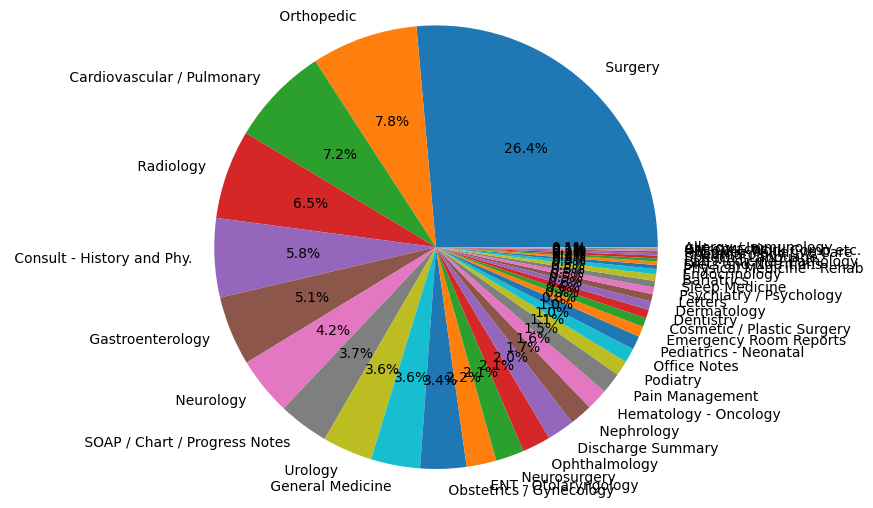

In [28]:
# YOUR CODE HERE
disp_data = data['medical_specialty'].value_counts()
targetLabels  = disp_data.index
plt.pie(x=disp_data, labels = targetLabels, autopct="%1.1f%%", radius=1.5,  labeldistance=1.1)
plt.show()



### Pre-process `transcription` and `keywords` text

**Exercise 5: Create functions to perform below tasks: [0.5 Mark]**

- Convert transcription and keywords text to lowercase
- Remove quotes from transcription and keywords text
- Remove all the special characters/punctuations
- Remove digits from transcription and keywords text
- Remove extra spaces

- **Convert `transcription` and `keywords` text to lowercase**

In [31]:
# Convert transcription and keywords text to lowercase
# YOUR CODE HERE
def lowercase(column):
    data[column] = data[column].str.lower()
    return data[column]

- **Remove quotes from `transcription` and `keywords` text**

In [35]:
[lowercase('transcription'), lowercase('keywords')]


[0       subjective:,  this 23-year-old white female presents with complaint of allergies.  she used to have allergies when she lived in seattle but she thinks they are worse here.  in the past, she has tr...
 1       past medical history:, he has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor.  he exercises three times a week at...
 2       history of present illness: , i have seen abc today.  he is a very pleasant gentleman who is 42 years old, 344 pounds.  he is 5'9".  he has a bmi of 51.  he has been overweight for ten years since...
 3       2-d m-mode: , ,1.  left atrial enlargement with left atrial diameter of 4.7 cm.,2.  normal size right and left ventricle.,3.  normal lv systolic function with left ventricular ejection fraction of...
 4       1.  the left ventricular cavity size and wall thickness appear normal.  the wall motion and left ventricular systolic function appears hyperdynamic with es

In [36]:
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"subjective:, this 23-year-old white female presents with complaint of allergies. she used to have allergies when she lived in seattle but she thinks they are worse here. in the past, she has tr...","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"past medical history:, he has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. he exercises three times a week at...","bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic,..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"history of present illness: , i have seen abc today. he is a very pleasant gentleman who is 42 years old, 344 pounds. he is 5'9"". he has a bmi of 51. he has been overweight for ten years since...","bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, ..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode: , ,1. left atrial enlargement with left atrial diameter of 4.7 cm.,2. normal size right and left ventricle.,3. normal lv systolic function with left ventricular ejection fraction of...","cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. the left ventricular cavity size and wall thickness appear normal. the wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%. ...,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation..."
...,...,...,...,...,...
4984,Patient suffered from morbid obesity for many years and made multiple attempts at nonsurgical weight loss without success.,Bariatrics,Discharge Summary - Gastric Bypass,"admission diagnosis:, morbid obesity. bmi is 51.,discharge diagnosis: , morbid obesity. bmi is 51.,procedure: , laparoscopic gastric bypass.,service: , surgery.,consult: , anesthesia and pain.,...","bariatrics, laparoscopic gastric bypass, gastric bypass, morbid obesity, liquid diet, bmi, discharge,"
4985,Patient presented to the Bariatric Surgery Service for consideration of laparoscopic Roux-en-Y gastric bypass.,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"history of present illness:, ms. a is a 55-year-old female who presented to the bariatric surgery service for consideration of laparoscopic roux-en-y gastric bypass. the patient states that she ...","bariatrics, jenny craig, medifast, nutrisystem, richard simmons, slim-fast, tops, weight watchers, cabbage diet, grape fruit diet, roux-en-y, laparoscopic roux-en-y gastric bypass, weight loss mod..."
4989,Evaluation for elective surgical weight loss via the Lap-Band as opposed to gastric bypass.,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,"past medical history: ,she had a negative stress test four to five years ago. she gets short of breath in walking about 30 steps. she has had non-insulin dependent diabetes for about eight year...","bariatrics, elective surgical weight loss, surgical weight loss, weight loss, lap band, gastric bypass, loss, weight, lap, band, l

In [37]:
# Remove quotes from transcription and keywords text
# YOUR CODE HERE
def remove_quotes(column):
    data[column] = data[column].str.replace('"', '')
    return data[column]

- **Remove punctuations**

In [38]:
remove_quotes('transcription')
remove_quotes('keywords')

,keywords
0,"allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,"bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic,..."
2,"bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, ..."
3,"cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation..."
4,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation..."
...,...
4984,"bariatrics, laparoscopic gastric bypass, gastric bypass, morbid obesity, liquid diet, bmi, discharge,"
4985,"bariatrics, jenny craig, medifast, nutrisystem, richard simmons, slim-fast, tops, weight watchers, cabbage diet, grape fruit diet, roux-en-y, laparoscopic roux-en-y gastric bypass, weight loss mod..."
4989,"bariatrics, elective surgical weight loss, surgical weight loss, weight loss, lap band, gastric bypass, loss, weight, lap, band, lost, gained, diabetes, gastric, bypass, overweight, surgical"
4993,"allergy / immunology, chronic glossitis, xerostomia, probable environmental inhalant allergies, probable food allergies, environmental inhalant allergies, rast allergy testing, rast, inhalant, foo..."


In [42]:
# Remove punctuations
# YOUR CODE HERE
import re
def cleanPunc(Text):
    Text = re.sub(r'  |,|\.|\!|"|\-|:|;|\*|\'|/|%|', '', Text, flags=re.MULTILINE)
    return Text

- **Remove digits from `transcription` and `keywords` text**

In [43]:
data['transcription'] = data['transcription'].apply(lambda x: cleanPunc(x))
data['keywords'] = data['keywords'].apply(lambda x: cleanPunc(x))

In [ ]:
data['keywords']

,keywords
0,allergy immunology allergic rhinitis allergies asthma nasal sprays rhinitis nasal erythematous allegra sprays allergic
1,bariatrics laparoscopic gastric bypass weight loss programs gastric bypass atkins diet weight watchers body weight laparoscopic gastric weight loss pounds months weight laparoscopic band loss diet...
2,bariatrics laparoscopic gastric bypass heart attacks body weight pulmonary embolism potential complications sleep study weight loss gastric bypass anastomosis loss sleep laparoscopic gastric bypas...
3,cardiovascular pulmonary 2d mmode doppler aortic valve atrial enlargement diastolic function ejection fraction mitral mitral valve pericardial effusion pulmonary valve regurgitation systolic func...
4,cardiovascular pulmonary 2d doppler echocardiogram annular aortic root aortic valve atrial atrium calcification cavity ejection fraction mitral obliteration outflow regurgitation relaxation patte...
...,...
4984,bariatrics laparoscopic gastric bypass gastric bypass morbid obesity liquid diet bmi discharge
4985,bariatrics jenny craig medifast nutrisystem richard simmons slimfast tops weight watchers cabbage diet grape fruit diet rouxeny laparoscopic rouxeny gastric bypass weight loss modalities surgical ...
4989,bariatrics elective surgical weight loss surgical weight loss weight loss lap band gastric bypass loss weight lap band lost gained diabetes gastric bypass overweight surgical
4993,allergy immunology chronic glossitis xerostomia probable environmental inhalant allergies probable food allergies environmental inhalant allergies rast allergy testing rast inhalant food allergy


In [44]:
# Remove digits from transcription and keywords sentences
# YOUR CODE HERE

def cleanDigits(Text):
    Text = re.sub(r'[0-9]', '', Text, flags=re.MULTILINE)
    return Text

- **Remove extra spaces**

In [45]:
data['transcription']

,transcription
0,subjectivethis 23yearold white female presents with complaint of allergiesshe used to have allergies when she lived in seattle but she thinks they are worse herein the past she has tried claritin ...
1,past medical history he has difficulty climbing stairs difficulty with airline seats tying shoes used to public seating and lifting objects off the floorhe exercises three times a week at home and...
2,history of present illness i have seen abc todayhe is a very pleasant gentleman who is 42 years old 344 poundshe is 59he has a bmi of 51he has been overweight for ten years since the age of 33 at...
3,2d mmode 1left atrial enlargement with left atrial diameter of 47 cm2normal size right and left ventricle3normal lv systolic function with left ventricular ejection fraction of 514normal lv diast...
4,1the left ventricular cavity size and wall thickness appear normalthe wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70 to 75there is n...
...,...
4984,admission diagnosismorbid obesitybmi is 51discharge diagnosis morbid obesitybmi is 51procedure laparoscopic gastric bypassservice surgeryconsult anesthesia and painhistory of present illness ...
4985,history of present illnessms a is a 55yearold female who presented to the bariatric surgery service for consideration of laparoscopic rouxeny gastric bypassthe patient states that she has been ove...
4989,past medical historyshe had a negative stress test four to five years agoshe gets short of breath in walking about 30 stepsshe has had noninsulin dependent diabetes for about eight years nowshe ha...
4993,historya 55yearold female presents selfreferred for the possibility of evaluation and treatment of allergies diminished taste xerostomia gastroesophageal reflux disease possible food allergies chr...


In [46]:
data['transcription'] = data['transcription'].apply(lambda x: cleanDigits(x))
data['keywords'] = data['keywords'].apply(lambda x: cleanDigits(x))

In [ ]:
data['transcription']

,transcription
0,subjectivethis yearold white female presents with complaint of allergiesshe used to have allergies when she lived in seattle but she thinks they are worse herein the past she has tried claritin an...
1,past medical history he has difficulty climbing stairs difficulty with airline seats tying shoes used to public seating and lifting objects off the floorhe exercises three times a week at home and...
2,history of present illness i have seen abc todayhe is a very pleasant gentleman who is years old poundshe is he has a bmi of he has been overweight for ten years since the age of at his highes...
3,d mmode left atrial enlargement with left atrial diameter of cmnormal size right and left ventriclenormal lv systolic function with left ventricular ejection fraction of normal lv diastolic func...
4,the left ventricular cavity size and wall thickness appear normalthe wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of to there is nearca...
...,...
4984,admission diagnosismorbid obesitybmi is discharge diagnosis morbid obesitybmi is procedure laparoscopic gastric bypassservice surgeryconsult anesthesia and painhistory of present illness ms a...
4985,history of present illnessms a is a yearold female who presented to the bariatric surgery service for consideration of laparoscopic rouxeny gastric bypassthe patient states that she has been overw...
4989,past medical historyshe had a negative stress test four to five years agoshe gets short of breath in walking about stepsshe has had noninsulin dependent diabetes for about eight years nowshe has ...
4993,historya yearold female presents selfreferred for the possibility of evaluation and treatment of allergies diminished taste xerostomia gastroesophageal reflux disease possible food allergies chron...


In [47]:
# Remove extra spaces
# YOUR CODE HERE
data['keywords'].str.strip()
data['transcription'].str.strip()

,transcription
0,subjectivethis yearold white female presents with complaint of allergiesshe used to have allergies when she lived in seattle but she thinks they are worse herein the past she has tried claritin an...
1,past medical history he has difficulty climbing stairs difficulty with airline seats tying shoes used to public seating and lifting objects off the floorhe exercises three times a week at home and...
2,history of present illness i have seen abc todayhe is a very pleasant gentleman who is years old poundshe is he has a bmi of he has been overweight for ten years since the age of at his highes...
3,d mmode left atrial enlargement with left atrial diameter of cmnormal size right and left ventriclenormal lv systolic function with left ventricular ejection fraction of normal lv diastolic func...
4,the left ventricular cavity size and wall thickness appear normalthe wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of to there is nearca...
...,...
4984,admission diagnosismorbid obesitybmi is discharge diagnosis morbid obesitybmi is procedure laparoscopic gastric bypassservice surgeryconsult anesthesia and painhistory of present illness ms a...
4985,history of present illnessms a is a yearold female who presented to the bariatric surgery service for consideration of laparoscopic rouxeny gastric bypassthe patient states that she has been overw...
4989,past medical historyshe had a negative stress test four to five years agoshe gets short of breath in walking about stepsshe has had noninsulin dependent diabetes for about eight years nowshe has ...
4993,historya yearold female presents selfreferred for the possibility of evaluation and treatment of allergies diminished taste xerostomia gastroesophageal reflux disease possible food allergies chron...


**Exercise 6: Remove the stopwords from `transcription` text [0.5 Mark]**

- **Remove stopwords**

In [48]:
# Function to remove the stopwords
import nltk
nltk.download('punkt_tab')
def remove_stopwords(text):

    # YOUR CODE HERE
    stop_words = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return " ".join(filtered_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [50]:
# Remove stopwords from transcriptions
# YOUR CODE HERE
data['transcription'] = data['transcription'].apply(lambda x: remove_stopwords(x))


**[OPTIONAL]** Visualize the distribution of word counts in both `transcription` and `keywords` text.

**Hint:**
- Get the text length of each sample
- pd.DataFrame().hist() OR sns.histplot()

In [51]:
data['transcription']

,transcription
0,subjectivethis yearold white female presents complaint allergiesshe used allergies lived seattle thinks worse herein past tried claritin zyrtecboth worked short time seemed lose effectivenessshe u...
1,past medical history difficulty climbing stairs difficulty airline seats tying shoes used public seating lifting objects floorhe exercises three times week home cardiohe difficulty walking two blo...
2,history present illness seen abc todayhe pleasant gentleman years old poundshe bmi overweight ten years since age highest pounds lowest pursuing surgical attempts weight loss feel good get healthy...
3,mmode left atrial enlargement left atrial diameter cmnormal size right left ventriclenormal lv systolic function left ventricular ejection fraction normal lv diastolic functionno pericardial effus...
4,left ventricular cavity size wall thickness appear normalthe wall motion left ventricular systolic function appears hyperdynamic estimated ejection fraction nearcavity obliteration seenthere also ...
...,...
4984,admission diagnosismorbid obesitybmi discharge diagnosis morbid obesitybmi procedure laparoscopic gastric bypassservice surgeryconsult anesthesia painhistory present illness ms yearold woman suffe...
4985,history present illnessms yearold female presented bariatric surgery service consideration laparoscopic rouxeny gastric bypassthe patient states overweight approximately years tried multiple weigh...
4989,past medical historyshe negative stress test four five years agoshe gets short breath walking stepsshe noninsulin dependent diabetes eight years nowshe left knee arthritis history hemorrhoidspast ...
4993,historya yearold female presents selfreferred possibility evaluation treatment allergies diminished taste xerostomia gastroesophageal reflux disease possible food allergies chronic gi irritability...


<Axes: xlabel='transcription_length', ylabel='Count'>

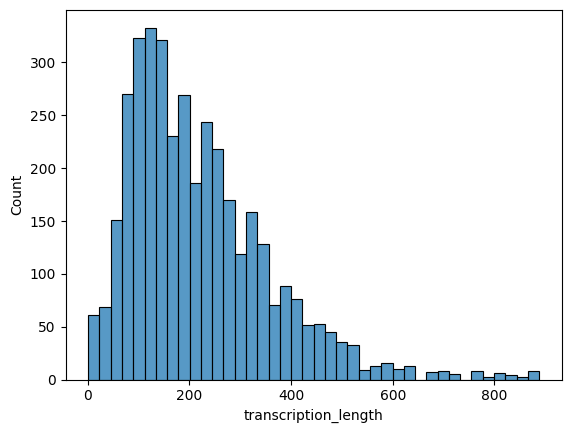

In [58]:
# Visualize the distribution of word counts
# YOUR CODE HERE
data['transcription_length'] = data['transcription'].apply(lambda x: len(x.split()))
sns.histplot(data['transcription_length'], stat="count")

### Select the maximum sequence length for both `transcription` and `keywords`

In [59]:
# Fix the maximum length of the transcript
# Fix the maximum keywords length

max_len_transcript = 250
max_len_keywords = 30

**Exercise 7: Add `'start'` and `'end'` to `keywords` text at the beginning and end respectively [0.5 Mark]**

- 'start' will represent the beginning of output sequence
- 'end' will represent the end of output sequence

In [60]:
# Add 'start' and 'end' to keywords text
# YOUR CODE HERE
data['keywords'] = data['keywords'].apply(lambda x : 'start ' + x + ' end')

### Split data into training and testing set

- test_size=0.1
- random_state=0
- shuffle=True

In [ ]:
data

,description,medical_specialty,sample_name,transcription,keywords,transcription_length
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,subjectivethis yearold white female presents complaint allergiesshe used allergies lived seattle thinks worse herein past tried claritin zyrtecboth worked short time seemed lose effectivenessshe u...,start allergy immunology allergic rhinitis allergies asthma nasal sprays rhinitis nasal erythematous allegra sprays allergic end,102
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history difficulty climbing stairs difficulty airline seats tying shoes used public seating lifting objects floorhe exercises three times week home cardiohe difficulty walking two blo...,start bariatrics laparoscopic gastric bypass weight loss programs gastric bypass atkins diet weight watchers body weight laparoscopic gastric weight loss pounds months weight laparoscopic band los...,222
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history present illness seen abc todayhe pleasant gentleman years old poundshe bmi overweight ten years since age highest pounds lowest pursuing surgical attempts weight loss feel good get healthy...,start bariatrics laparoscopic gastric bypass heart attacks body weight pulmonary embolism potential complications sleep study weight loss gastric bypass anastomosis loss sleep laparoscopic gastric...,416
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,mmode left atrial enlargement left atrial diameter cmnormal size right left ventriclenormal lv systolic function left ventricular ejection fraction normal lv diastolic functionno pericardial effus...,start cardiovascular pulmonary d mmode doppler aortic valve atrial enlargement diastolic function ejection fraction mitral mitral valve pericardial effusion pulmonary valve regurgitation systolic...,44
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,left ventricular cavity size wall thickness appear normalthe wall motion left ventricular systolic function appears hyperdynamic estimated ejection fraction nearcavity obliteration seenthere also ...,start cardiovascular pulmonary d doppler echocardiogram annular aortic root aortic valve atrial atrium calcification cavity ejection fraction mitral obliteration outflow regurgitation relaxation ...,154
...,...,...,...,...,...,...
4984,Patient suffered from morbid obesity for many years and made multiple attempts at nonsurgical weight loss without success.,Bariatrics,Discharge Summary - Gastric Bypass,admission diagnosismorbid obesitybmi discharge diagnosis morbid obesitybmi procedure laparoscopic gastric bypassservice surgeryconsult anesthesia painhistory present illness ms yearold woman suffe...,start bariatrics laparoscopic gastric bypass gastric bypass morbid obesity liquid diet bmi discharge end,171
4985,Patient presented to the Bariatric Surgery Service for consideration of laparoscopic Roux-en-Y gastric bypass.,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,history present illnessms yearold female presented bariatric surgery service consideration laparoscopic rouxeny gastric bypassthe patient states overweight approximately years tried multiple weigh...,start bariatrics jenny craig medifast nutrisystem richard simmons slimfast tops weight watchers cabbage diet grape fruit diet rouxeny laparoscopic rouxeny gastric bypass weight loss modalities sur...,377
4989,Evaluation for elective surgical weight loss via the Lap-Band as opposed to gastric bypass.,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,past medical historyshe negative stress test four five years agoshe gets short breath walking stepsshe noninsulin dependent diabetes eight years nowshe left knee arthritis history hemorrhoidspast ...,start bariatrics elective surgical weight loss surgical weight loss weight loss lap band 

In [69]:
train_test_df, val_df = train_test_split(data[['transcription','keywords']], test_size=0.1, random_state=0, shuffle=True)
train_df, test_df = train_test_split(train_test_df, test_size=0.1, random_state=0, shuffle=True)

len(train_df), len(val_df), len(test_df),\
print("Total count of transcripts:", sum([len(train_df), len(val_df), len(test_df)]))


Total count of transcripts: 3817


(3091, 382, 344, None)

### Tokenization and padding

**Exercise 8: Convert the `transcription` and `keywords` text to sequence of integer values, and make them of uniform length [0.5 Mark]**

- Use two tokenizers to tokenize transcription and keywords separately
  
  **Hint:** [Tokenizer()](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer), `.fit_on_texts()`, `.texts_to_sequences()`

- Pad/Truncate both sequences as per their max sequence length specified in above exercises
    - use padding='post', truncating='post'
    - for transcription, (use maxlen= max_len_transcript)
    - for keywords, (use maxlen= max_len_keywords + 1)

  **Hint:** [`pad_sequences(`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)`sequences= , maxlen= , padding='post', truncating='post')`

- For long keywords sequences, the 'end' token might get truncated
    - replace the last token with the token index of 'end'

- save the vocab size for both sequences

In [70]:
# Instantiate tokenizer for transcripts
x_tokenizer = Tokenizer()

# Fit on training data
# YOUR CODE HERE

train_transcription_tokenizer =  x_tokenizer.fit_on_texts(train_df['transcription'])
val_transcription_tokenizer =  x_tokenizer.fit_on_texts(val_df['transcription'])


# Convert transcript sequences into integer sequences for both train and val set
# YOUR CODE HERE
train_transcription_seq = x_tokenizer.texts_to_sequences(train_df['transcription'])
val_transcription_seq = x_tokenizer.texts_to_sequences(val_df['transcription'])

# Add zero padding upto maximum length
# YOUR CODE HERE
train_transcription_seq = pad_sequences(sequences= train_transcription_seq, maxlen= max_len_transcript , padding='post', truncating='post')
val_transcription_seq = pad_sequences(sequences= val_transcription_seq, maxlen= max_len_transcript , padding='post', truncating='post')



# x vocab size
x_voc_size = len(x_tokenizer.word_index) +1
x_voc_size

49141

In [71]:
# Instantiate tokenizer for keywords
y_tokenizer = Tokenizer()

# Fit on training data
# YOUR CODE HERE

train_keywords_tokenizer =  y_tokenizer.fit_on_texts(train_df['keywords'])
val_keywords_tokenizer =  y_tokenizer.fit_on_texts(val_df['keywords'])

# Convert keywords sequences into integer sequences for train and val set
# YOUR CODE HERE
train_keywords_seq = y_tokenizer.texts_to_sequences(train_df['keywords'])
val_keywords_seq = y_tokenizer.texts_to_sequences(val_df['keywords'])

# Add zero padding upto maximum length
# YOUR CODE HERE

train_keywords_seq = pad_sequences(sequences= train_keywords_seq, maxlen= max_len_keywords+1 , padding='post', truncating='post')
val_keywords_seq = pad_sequences(sequences= val_keywords_seq, maxlen= max_len_keywords+1 , padding='post', truncating='post')


# y vocab size
y_voc_size = len(y_tokenizer.word_index) +1
y_voc_size

5941

- **For long keywords sequences, replace the last token with the token index of 'end'**

In [72]:
print(y_tokenizer.word_index['end'])

1


In [73]:
# Replace the last token with the token index of 'end' for long sequences

# Apply on Train keywords set
# YOUR CODE HERE
for i in range(len(train_keywords_seq)):
  train_keywords_seq[i][max_len_keywords] = y_tokenizer.word_index['end']

# Apply on Validation keywords set
# YOUR CODE HERE
for i in range(len(val_keywords_seq)):
  val_keywords_seq[i][max_len_keywords] = y_tokenizer.word_index['end']


In [74]:
train_keywords_seq[0]

array([   2,    2,   35,   28,    4,   40, 1180, 5379, 3234, 1803, 3235,
       3236, 1002, 1104,    1,    1,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    1], dtype=int32)

### Positional Embedding

**Exercise 9: Create a class, `PositionalEmbedding` [1 Mark]**

- Use `mask_zero=True`, while defining token embeddings layer

- Make sure to make this layer a mask-generating layer by adding a method `compute_mask()`

In [75]:
# Using positional encoding to re-inject order information

class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        # input_dim = (token) vocabulary size, output_dim = embedding size
        super().__init__(**kwargs)

        # Embedding layer for token embeddings:
        # Converts tokens into dense vector representations of size `output_dim`.
        self.token_embeddings = layers.Embedding(input_dim=input_dim, output_dim=output_dim)
        # Q: what is input_dim and output_dim? A: vocab size, embedding dim

        # Embedding layer for positional embeddings:
        # Assigns a unique embedding to each position in the sequence (0 to sequence_length-1).
        self.position_embeddings = layers.Embedding(input_dim=sequence_length, output_dim=output_dim)
        # Q: Why input_dim = seq_length?  A: there are seq_len; no. of possible positions
        # Q: What is the vocab for this Embedding layer? A: seq_length

        # Store the sequence length, input dimension, and output dimension.
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):  # Inputs will be a batch of sequences (batch_size, seq_len)
        # Extract the sequence length dynamically from the input tensor.
        length = tf.shape(inputs)[-1]  # `length` will just be sequence length.

        # Generate position indices (0 to sequence_length-1) for the input sequence.
        positions = tf.range(start=0, limit=length, delta=1)  # Indices for input to positional embedding.

        # Convert token IDs in `inputs` to dense embeddings using `token_embeddings`.
        embedded_tokens = tf.reshape(self.token_embeddings(inputs), (-1, length, self.output_dim))

        # Convert position indices to dense embeddings using `position_embeddings`.
        embedded_positions = tf.reshape(self.position_embeddings(positions), (-1, length, self.output_dim))

        # Add token embeddings and positional embeddings element-wise.
        return layers.Add()([embedded_tokens, embedded_positions])  # ADD the embeddings.

    def compute_mask(self, inputs, mask=None):  # Makes this layer a mask-generating layer.
        if mask is None:
            return None  # If no mask is provided, return None.
        # Generate a boolean mask where tokens equal to 0 (padding tokens) are marked as False.
        return tf.math.not_equal(inputs, 0)  # Mask will get propagated to the next layer.

    # When using custom layers, this enables the layer to be reinstantiated from its config dict,
    # which is useful during model saving and loading.
    def get_config(self):
        # Get the configuration of the parent class and update it with custom attributes.
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            "output_dim": self.output_dim,        # Embedding dimension size.
            "sequence_length": self.sequence_length,  # Maximum sequence length.
            "input_dim": self.input_dim,         # Vocabulary size.
        })
        return config


### Encoder Block

**Exercise 10: Create a class, `TransformerEncoder` [1 Mark]**

- While calling `attention` layer, do not use `attention_mask` parameter

- In Feed forward network, add `Dropout(0.1)` layer after 2 dense layers

- For skip connections, use `tf.keras.layers.Add()` instead of `'+'`

In [76]:
# Defining a custom Transformer Encoder layer by subclassing the `layers.Layer` class in Keras.
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        # Initialize the parent Layer class with any additional keyword arguments.
        super().__init__(**kwargs)

        # Store the embedding dimension, which defines the size of input embeddings (e.g., 4 in a dummy example).
        self.embed_dim = embed_dim

        # Define the size of the dense (fully connected) layer in the feedforward network within the encoder.
        self.dense_dim = dense_dim

        # Define the number of attention heads in the Multi-Head Attention mechanism.
        self.num_heads = num_heads

        # Create a Multi-Head Attention layer for self-attention, with specified number of heads and embedding dimension.
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)

        # Build a feedforward neural network (FFN) with two dense layers.
        # The first layer uses ReLU activation, and the second projects back to the embedding dimension.
        self.dense_proj = keras.Sequential([
            layers.Dense(dense_dim, activation="relu"),  # Expands to `dense_dim`.
            layers.Dense(embed_dim)                      # Projects back to `embed_dim` to match input shape.
        ])


        # Layer normalization for stabilizing training and improving convergence.
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

        self.add = layers.Add()

    # Define the forward pass logic for the Transformer Encoder layer.
    def call(self, inputs, mask=None):
        # Apply masking if a mask is provided, adding a new axis to the mask tensor.
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
            print(f"**test: mask in not None. mask = {mask}")

        # Perform self-attention with inputs as query, key, and value.
        # This makes it a "self-attention" mechanism as all arguments come from the same source (inputs).
        attention_output = self.attention(
            query=inputs,             # The query tensor.
            value=inputs,             # The value tensor.
            key=inputs                # The key tensor.

        )

        # Apply residual connection and normalization after the attention step.
        proj_input = self.layernorm_1(inputs + attention_output)

        # Pass the normalized result through the feedforward network.
        proj_output = self.dense_proj(proj_input)

        # Apply another residual connection and normalization after the feedforward network.
        return self.layernorm_2(proj_input + proj_output)

    # Define a method to return the configuration of the layer (for serialization purposes).
    def get_config(self):
        # Retrieve the configuration from the parent class and update it with custom attributes.
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,  # Embedding dimension.
            "num_heads": self.num_heads,  # Number of attention heads.
            "dense_dim": self.dense_dim,  # Size of the dense layer in the FFN.
        })
        return config

### Decoder Block

**Exercise 11: Create a class, `TransformerDecoder` [1 Mark]**

- Do not create any separate function to get causal attention mask, just pass `use_causal_mask = True` parameter while calling `attention_1` layer

- While calling `attention_2` layer, do not use `attention_mask` parameter

- In Feed forward network, add `Dropout(0.1)` layer after 2 dense layers

- For skip connections, use `tf.keras.layers.Add()` instead of `'+'`

In [77]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        # Define the layers. Let's point them out in the diagram
        super().__init__(**kwargs)
        self.embed_dim = embed_dim  # Dimension of embedding (e.g., 256)
        self.dense_dim = dense_dim  # Number of neurons in dense layer (e.g., 32)
        self.num_heads = num_heads  # Number of heads for MultiHead Attention layer

        # Now we have 2 MultiHead Attention layers - one for self attention and one for generalized attention
        self.attention_1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)  # Self-attention
        self.attention_2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)  # Cross-attention
        self.dense_proj = keras.Sequential([layers.Dense(dense_dim, activation="relu"),  # Fully connected layers
                                            layers.Dense(embed_dim),]
                                           )

        # Layer normalization for stabilizing training and improving performance
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.add = layers.Add()

        self.supports_masking = True  # Ensures that the layer will propagate its input mask to its outputs

    def get_config(self):
        # Provides a configuration dictionary for the custom layer, for model serialization
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config


    def call(self, inputs, encoder_outputs, mask=None):
        # `inputs`: decoder input sequence
        # `encoder_outputs`: output of the encoder (key-value pairs for cross-attention)
        # `mask`: optional mask for padding (e.g., for handling padded tokens)




        attention_output_1 = self.attention_1(query=inputs,
                                                value=inputs,
                                                key=inputs,
                                                use_causal_mask = True)

        attention_output_1 = self.layernorm_1(self.add([inputs, attention_output_1]))

        attention_output_2 = self.attention_2(query=attention_output_1,
                                                value=encoder_outputs,
                                                key=encoder_outputs)

        attention_output_2 = self.layernorm_2(self.add([attention_output_1, attention_output_2]))

        proj_output = self.dense_proj(attention_output_2)

        return self.layernorm_3(self.add([attention_output_2, proj_output]))



### Build Transformer model

**Exercise 12: Create a transformer model with below points: [1 Mark]**

- Use the respective vocabulary size for PositionalEmbedding of encode and decoder inputs

- Add `Dropout(0.1)` layers after both encoder and decoder PositionalEmbedding layers

- Do not use `activation="softmax"` for the last dense classification layer (You will be required to create a custom loss, and metric in the next stage.)

- Add a stack of 4 encoder blocks and 4 decoder blocks to your transformer

In [98]:
# Create transformer model

embed_dim = 256
dense_dim = 2048
num_heads = 8

max_len_transcript = 250
max_len_keywords = 30

encoder_inputs = keras.Input(shape=(None,))

# YOUR CODE HERE ...
encoder_inputs = keras.Input(shape=(None,), name="keyword")

x = PositionalEmbedding(max_len_keywords, x_voc_size, embed_dim)(encoder_inputs)
x = layers.Dropout(0.1)(x)

x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)  # Pass through the Transformer encoder
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)

encoder_outputs = x



decoder_inputs = keras.Input(shape=(None,))
x = PositionalEmbedding(max_len_keywords, max_len_transcript, embed_dim)(decoder_inputs)
x = layers.Dropout(0.1)(x)

x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)

x = layers.Dropout(0.1)(x)


# YOUR CODE HERE ...


decoder_outputs = layers.Dense(y_voc_size)(x)

transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
transformer.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ keyword (InputLayer)      │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positional_embedding_2    │ (None, None, 256)      │     12,587,776 │ keyword[0][0]          │
│ (PositionalEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, None, 256)      │              0 │ positional_embedding_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_4     │ (None, None, 256)      │      3,155,456 │ dropout_15[0][0]       │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_16            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_5     │ (None, None, 256)      │      3,155,456 │ transformer_encoder_4… │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positional_embedding_3    │ (None, None, 256)      │         71,680 │ input_layer_16[0][0]   │
│ (PositionalEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_6     │ (None, None, 256)      │      3,155,456 │ transformer_encoder_5… │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout)      │ (None, None, 256)      │              0 │ positional_embedding_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_7     │ (None, None, 256)      │      3,155,456 │ transformer_encoder_6… │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_decoder_4     │ (None, None, 256)      │      5,259,520 │ dropout_20[0][0],      │
│ (TransformerDecoder)      │                        │                │ transformer_encoder_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_decoder_5     │ (None, None, 256)      │      5,259,520 │ transformer_decoder_4… │
│ (TransformerDecoder)      │                        │                │ transformer_encoder_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_decoder_6     │ (None, None, 256)      │      5,259,520 │ transformer_decoder_5… │
│ (TransformerDecoder)      │                        │                │ transformer_encoder_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_decoder_7     │ (None, None, 256)      │      5,259,520 │ transformer_decoder_6… │
│ (TransformerDecoder)      │                        │                │ transformer_encoder_7… │
├──────────────────────

 Total params: 47,846,197 (182.52 MB)

 Trainable params: 47,846,197 (182.52 MB)

 Non-trainable params: 0 (0.00 B)

## Model Compilation and Training [1 Mark]

**Exercise 13: Set up the optimizer**

Refer [here](https://www.tensorflow.org/text/tutorials/transformer#set_up_the_optimizer) for the following steps:

- Use the Adam optimizer with a custom learning rate scheduler

- Instantiate the Adam optimizer with custom learning rate

In [99]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


In [100]:
# Instantiate the Adam optimizer with custom learning rate
learning_rate = CustomSchedule(d_model=embed_dim)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)


**Exercise 14: Set up the loss and metrics**

- Apply a padding mask while calculating the loss with cross-entropy loss function as demonstrated [here](https://www.tensorflow.org/text/tutorials/transformer#set_up_the_loss_and_metrics).  

In [101]:
def masked_loss(label, pred):
  mask = tf.math.logical_not(tf.math.equal(label, 0))  # Create a mask where padding tokens (0) are False
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')  # Use SparseCategoricalCrossentropy for integer labels
  loss_ = loss_object(label, pred)  # Calculate the loss

  mask = tf.cast(mask, dtype=loss_.dtype)  # Cast the mask to the same data type as the loss
  loss_ *= mask  # Apply the mask to the loss

  return tf.reduce_sum(loss_) / tf.reduce_sum(mask)


def masked_accuracy(label, pred):
    mask = tf.math.logical_not(tf.math.equal(label, 0))  # Create the padding mask
    pred = tf.math.argmax(pred, axis=-1)  # Get the predicted class indices
    label = tf.cast(label, pred.dtype)
    match = tf.math.equal(label, pred)  # Calculate the match between labels and predictions
    match = tf.cast(match, dtype=tf.float32)  # Cast the match to float32
    mask = tf.cast(mask, dtype=tf.float32) # Cast the mask to float32
    match *= mask
    return tf.reduce_sum(match) / tf.reduce_sum(mask)



**Exercise 15: Compile transformer model with custom optimizer, loss, and metric & perform training [0.5 Mark]**

- Use [*transcription sequences*, and *keywords sequences(shifted right)*] as input to transformer

- Train model using colab's GPU runtime with batch_size=32, and epochs=30. (It might take one minute per epoch with GPU)

**Hint:** Check if the training code is running without any errors with CPU runtime, later switch to GPU runtime for faster training. Once trained, save the model weights, and download into your system for later use.

In [102]:
# Compile
transformer.compile(optimizer=optimizer, loss=masked_loss, metrics=[masked_accuracy])

In [103]:
# Train
encoder_input_data = train_transcription_seq  # Input to the encoder
decoder_input_data = train_keywords_seq[:, :-1]  # Input to the decoder (shifted right)
decoder_target_data = train_keywords_seq[:, 1:]  # Target for the decoder (original sequence)

# Create a dummy input to initialize optimizer variables:
dummy_input_enc = tf.zeros(shape=(1, encoder_input_data.shape[1]), dtype=tf.int32)
dummy_input_dec = tf.zeros(shape=(1, decoder_input_data.shape[1]), dtype=tf.int32)

# Explicitly initialize all variables within the model and optimizer.
with tf.device('/GPU:0'):  # Specify the device for initialization
    _ = transformer([dummy_input_enc, dummy_input_dec])  # Call the model once to trigger variable initialization

# Force initialization of all uninitialized variables:
for var in transformer.trainable_variables:
    if isinstance(var, tf.Variable) and not tf.compat.v1.is_variable_initialized(var).numpy(): #check if var is not initialized

        try:
            var.assign(tf.zeros_like(var))  # Initialize with zeros
        except:
            pass  # Ignore errors for non-assignable variables

# Train the model
history = transformer.fit(
    x=[encoder_input_data, decoder_input_data],  # Input data for encoder and decoder
    y=decoder_target_data,  # Target data for the decoder
    batch_size=32,  # Batch size for training
    epochs=3,  # Number of training epochs
    validation_split=0.1)


Epoch 1/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 119s 786ms/step - loss: 8.5558 - masked_accuracy: 0.0528 - val_loss: 7.9549 - val_masked_accuracy: 0.1432
Epoch 2/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 93s 452ms/step - loss: 7.8204 - masked_accuracy: 0.1535 - val_loss: 7.5076 - val_masked_accuracy: 0.1648
Epoch 3/3
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 436ms/step - loss: 7.3159 - masked_accuracy: 0.1736 - val_loss: 7.0157 - val_masked_accuracy: 0.1755


### Save model weights

In [104]:
!mkdir my_model_weights

mkdir: cannot create directory ‘my_model_weights’: File exists


In [105]:
# Save model weights
# It will create a '.weights.h5' file which can be downloaded into your system from colab

transformer.save_weights('my_model_weights/my_weights.weights.h5')

In [106]:
# OR
# Make a zip file, which also can be downloaded into your system from colab

!zip -r 'my_model_weights.zip' 'my_model_weights'

updating: my_model_weights/ (stored 0%)
updating: my_model_weights/my_weights.weights.h5 (deflated 10%)


### Load model weights

Whenever you need to use this trained model weights:
* use the model architecture to create exact same model
* then load the trained weights directly using below code

In [107]:
# To load model weights
transformer.load_weights('my_model_weights/my_weights.weights.h5')

## Run Inference

**Exercise 16: Create a function to extract keywords, given transcription text as input [1 Mark]**

- Encode the input sentence using the Transcription tokenizer. This is the encoder input
- Initialize decoder input with the 'start' token
- The decoder then outputs the predictions by looking at the encoder output and its own output (self-attention).
- Concatenate the predicted token to the decoder input and pass it to the decoder repeatedly
- Make decoder predict the next token based on the previous tokens it has predicted

In [108]:
def extract_keywords(sentence, transformer=transformer):

    """ Takes an input sentence, and transformer. Returns extracted keywords. """

    # Convert input sentence into integer sequence (Note that tokenizer.texts_to_sequences() take list of text as input)
    ip_tokens = x_tokenizer.texts_to_sequences([sentence])

    # Add zero padding upto maximum length transcription
    ip_tok_seq = tf.keras.preprocessing.sequence.pad_sequences(ip_tokens, maxlen=max_len_transcript, padding='post', truncating='post')

    # Create a decoder sequence with 'start' token index
    dec_tok_seq = np.array([y_tokenizer.word_index['start']])

    # Variable to store the output text string
    keyword_sentence = ''

    for i in range(max_len_keywords):

        # Get output logits from transformer
        pred = transformer([ip_tok_seq.reshape(1,-1), dec_tok_seq.reshape(1, -1)], training=False)
        pred = pred[:, -1:, :]

        # Select the index with max value from 'pred' to get the output token index
        token = np.argmax(pred[0][0])

        # Convert output token to word
        word = y_tokenizer.index_word[token]

        # End the loop if word is 'end'
        if word == 'end':
            break

        # Append 'token' to dec_tok_seq
        dec_tok_seq = np.append(dec_tok_seq, token)

        # Append 'word' to keyword sentence
        keyword_sentence += word + ' '

    return keyword_sentence.strip()


In [113]:
# Predict keywords for a sample input

predextracted = extract_keywords('SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,Lungs:  Clear.,ASSESSMENT:,  Allergic rhinitis.,PLAN:,1.  She will try Zyrtec instead of Allegra again.  Another option will be to use loratadine.  She does not think she has prescription coverage so that might be cheaper.,2.  Samples of Nasonex two sprays in each nostril given for three weeks.  A prescription was written as well. REASON FOR VISIT:,  Lap band adjustment.,HISTORY OF PRESENT ILLNESS:,  Ms. A is status post lap band placement back in 01/09 and she is here on a band adjustment.  Apparently, she had some problems previously with her adjustments and apparently she has been under a lot of stress.  She was in a car accident a couple of weeks ago and she has problems, she does not feel full.  She states that she is not really hungry but she does not feel full and she states that she is finding when she is hungry at night, having difficulty waiting until the morning and that she did mention that she had a candy bar and that seemed to make her feel better.,PHYSICAL EXAMINATION: , On exam, her temperature is 98, pulse 76, weight 197.7 pounds, blood pressure 102/72, BMI is 38.5, she has lost 3.8 pounds since her last visit.  She was alert and oriented in no apparent distress.  ,PROCEDURE:  ,I was able to access her port.  She does have an AP standard low profile.  I aspirated 6 mL, I did add 1 mL, so she has got approximately 7 mL in her band, she did tolerate water postprocedure.,ASSESSMENT:,  The patient is status post lap band adjustments, doing well, has a total of 7 mL within her band, tolerated water postprocedure.  She will come back in two weeks for another adjustment as needed.,')

predextracted


'start surgery'

## Gradio Implementation [OPTIONAL]

Gradio is an open-source python library that allows us to quickly create easy-to-use, customizable UI components for our ML model, any API, or any arbitrary function in just a few lines of code. We can integrate the GUI directly into the Python notebook, or we can share the link with anyone.

In [110]:
!pip -qq install gradio

In [111]:
import gradio

In [112]:
# Input from user
in_transcript = gradio.Textbox(lines=10, placeholder=None, value="transcription", label='Enter Transcription Text')

# Output prediction
out_keywords = gradio.Textbox(type="text", label='Extracted Keywords')


# Gradio interface to generate UI
iface = gradio.Interface(fn = extract_keywords,
                         inputs = [in_transcript],
                         outputs = [out_keywords],
                         title = "Keywords Extraction",
                         description = "Using transformer model, trained from scratch",
                         allow_flagging = 'never')

iface.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ef3187311724c3765b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Click on the link generated above to see UI.